> ## **Bike Sharing**

> Created By: Luqman Ilman Muhammad

****


[Data Source](https://drive.google.com/drive/folders/17Mw_4wSRiBB5vLLQJN137AlAbyB3CLFx)

## **Contents**

1. Business Problem
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem** 

> Context

Bike-sharing systems are a new generation of traditional bike rentals where the whole process, from membership, rental, and return back, has become automatic. Through these systems, a user can easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, great interest exists in these systems due to their important role in traffic, environmental, and health issues.<br>
Apart from interesting real-world applications of bike-sharing systems, the characteristics of data generated by these systems make them attractive for research. Unlike other transport services such as buses or subways, the duration of travel, departure, and arrival position is explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected by monitoring these data.


> Problem Statement

One of the major challenges in bike-sharing systems is ensuring an adequate number of bikes are available under all conditions and situations. Failing to meet the demand of the bike-sharing system users can lead to a loss of customer trust. Conversely, if there are too many bikes available, it results in many unused units, leading to inefficiency. Moreover, the dynamic nature of bike-sharing data, which includes the explicit recording of travel duration, departure, and arrival positions, adds complexity to predicting demand accurately. This intricate data can act as a virtual sensor network, providing insights into urban mobility patterns and potentially detecting significant city events. Ensuring a balanced and responsive bike-sharing system is essential for maintaining user satisfaction, optimizing resource allocation, and leveraging data for broader urban planning and mobility insights.

> Goals

Given the challenges, Capital Bikeshare requires a reliable tool to accurately forecast and assist all stakeholders (both clients and Capital Bikeshare) in determining the optimal number of bikes available under various conditions and situations. By factoring in variables such as weather, seasons, humidity, and temperature, the precision of bike availability predictions can be enhanced. This approach not only boosts profitability but also ensures operational cost efficiency for Capital Bikeshare. For users, precise predictions are crucial in meeting their demands effectively. Additionally, leveraging the unique data characteristics of bike-sharing systems can provide valuable insights into urban mobility, helping to detect important city events and contribute to smarter city planning and traffic management.

> Analytic Approach

The data will be analyzed to identify patterns among the features, distinguishing one condition from another, and understanding how each feature affects the number of bikes that need to be available. Initially, exploratory data analysis (EDA) will be conducted to gain insights into the dataset, identify correlations, and detect any anomalies or outliers. This involves visualizing data distributions, examining relationships between variables, and summarizing statistical properties.

Following the EDA, feature engineering will be applied to create new variables or transform existing ones to enhance the predictive power of the model. This could include creating interaction terms, normalizing variables, and encoding categorical data. The aim is to capture the underlying relationships in the data more effectively.

Next, a regression model will be developed to determine the optimal number of bikes that should be provided by Capital Bikeshare. Various regression techniques, such as linear regression, decision trees, and ensemble methods, will be explored to find the most accurate and robust model. Cross-validation will be used to assess the model's performance and prevent overfitting.

Furthermore, the impact of variables such as weather, seasons, humidity, and temperature on bike availability will be specifically examined. This involves incorporating these factors into the model and evaluating their significance and contribution to the prediction accuracy.

After building and validating the model, it will be deployed to make real-time predictions of bike availability under different conditions. The predictions will be continuously monitored and the model will be periodically retrained with new data to maintain its accuracy and relevance.

Finally, the insights gained from the data and the model will be used to provide actionable recommendations for optimizing bike distribution and improving overall system efficiency. This will help ensure that an adequate number of bikes are available at all times, enhancing user satisfaction and operational effectiveness.

> Metric Evaluation

Metric evaluation includes **MAE**, **MAPE**, and **R-squared** as evaluation metrics:

- **MAE (Mean Absolute Error)**: Measures the average magnitude of errors in a set of predictions, without considering their direction. It is the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight. Lower MAE values indicate higher accuracy.

- **MAPE (Mean Absolute Percentage Error)**: Expresses accuracy as a percentage and is calculated as the average of the absolute percentage errors. It provides a relative measure of prediction accuracy and is particularly useful when comparing the accuracy across different datasets. Lower MAPE values indicate higher accuracy.

- **R-squared (Coefficient of Determination)**: For linear models, this metric is used to evaluate how well the model explains the variance in the data. It represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. An R-squared value closer to 1 indicates a better fit to the observed data. However, R-squared is not applicable to non-linear models due to the complexity and nature of these models.

In addition to these primary metrics, other evaluation metrics such as **RMSE (Root Mean Squared Error)** and **Adjusted R-squared** could also be considered for a more comprehensive assessment of model performance. RMSE provides insight into the magnitude of prediction errors, while Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model, preventing overestimation of model performance.







****
<br>
 
 ## Data Understanding

* The dataset is bike-sharing data in `Capital Bikeshare` system in the period 2011-2012
* Each row of data represents information regarding borrowing time, weather, and the corresponding season.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Object | Date |
| hum | Float | Normalized humidity (the values are divided to 100)|
| weathersit | Integer | 1: Clear, Few clouds, Partly cloudy, Partly cloudy<br> 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br> 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br> 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| holiday | Integer | 0: Not holiday<br> 1: Holiday |
| season | Integer | 1: Winter<br> 2: Spring<br> 3: Summer<br> 4: Fall |
| atemp | Float | "Feels like" temperature in Celsius |
| temp | Float | Normalized temperature in Celsius |
| hr | Integer | Hour (0 to 23) |
| casual | Integer | Count of casual users |
| registered | Integer | Count of registered users |
| cnt | Integer | Count of total rental bikes including both casual and registered users|

In [271]:
#Import library for exploration dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [272]:
#load dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


****
<br>

 ## Data Preprocessing

At this stage, we will carry out data cleaning, and the refined data will be utilized for subsequent analysis. The tasks to be completed include:

- Renaming some columns and values to enhance data readability.
- Converting feature data types to align with their respective values.
- Identifying and addressing missing values and duplicate entries.
- Removing irrelevant features that do not pertain to the current issue.
- Removing features directly related to the target
- Analyzing correlations between data points.
- Detecting outliers within the numeric data.

In [273]:
#Create duplicate DataFrame
df_model = df.copy()

In [274]:
df_model.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


> **Adjustment for name and value columns** 

In [275]:
#Sort the dataset based on date and hour
df_model = df_model.sort_values(['dteday','hr']).reset_index()
df_model.drop('index',axis=1,inplace=True)

In [276]:
columns = ['dteday', 'hr', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'casual', 'registered', 'cnt']
df_model = df_model[columns]
df_model

,dteday,hr,hum,weathersit,holiday,season,atemp,temp,casual,registered,cnt
0,2011-01-01,0,0.81,1,0,1,0.2879,0.24,3,13,16
1,2011-01-01,1,0.80,1,0,1,0.2727,0.22,8,32,40
2,2011-01-01,2,0.80,1,0,1,0.2727,0.22,5,27,32
3,2011-01-01,3,0.75,1,0,1,0.2879,0.24,3,10,13
4,2011-01-01,4,0.75,1,0,1,0.2879,0.24,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-12-31,14,0.45,2,0,1,0.2727,0.28,62,185,247
12161,2012-12-31,16,0.48,2,0,1,0.2576,0.26,30,184,214
12162,2012-12-31,17,0.48,2,0,1,0.2879,0.26,14,150,164
12163,2012-12-31,19,0.60,2,0,1,0.2576,0.26,11,108,119


In [277]:
#change the value column 'season' and 'weathersit' from numerical into categorical
df_model['season'] = df_model['season'].replace({1:'winter', 2:'spring', 3:'summer', 4:'fall'})
df_model['weathersit'] = df_model['weathersit'].replace({1:'clear', 2:'cloudy', 3:'Light snow/Light rain', 4:'Heavy rain/Snow'})

In [278]:
#Renaming some columns
df_model = df_model.rename(columns={'weathersit':'weather',
                       'dteday':'date',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count'})
df_model.head()

,date,hour,humidity,weather,holiday,season,atemp,temp,casual,registered,count
0,2011-01-01,0,0.81,clear,0,winter,0.2879,0.24,3,13,16
1,2011-01-01,1,0.80,clear,0,winter,0.2727,0.22,8,32,40
2,2011-01-01,2,0.80,clear,0,winter,0.2727,0.22,5,27,32
3,2011-01-01,3,0.75,clear,0,winter,0.2879,0.24,3,10,13
4,2011-01-01,4,0.75,clear,0,winter,0.2879,0.24,0,1,1


> Change datatypes and separate 'date' columns

In [279]:
df_model['month'] = pd.to_datetime(df_model['date']).dt.month
df_model['year'] = pd.to_datetime(df_model['date']).dt.year
df_model['dayname'] = pd.to_datetime(df_model['date']).dt.day_of_week

In [280]:
df_model['holiday'] = df_model['holiday'].astype('category')
df_model['year'] = df_model['year'].astype('category')
df_model['month'] = df_model['month'].astype('category')
df_model["dayname"] = df_model["dayname"].astype("category")

I decided to change the type of the columns `holiday`, `year`, `month`,`dayname`. This is because, as we can see in the data, even though there are differences between each of these numbers, it is possible that 7 is not greater than 1 and they have the same level in hierarchy.

In [281]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   date        12165 non-null  object  
 1   hour        12165 non-null  int64   
 2   humidity    12165 non-null  float64 
 3   weather     12165 non-null  object  
 4   holiday     12165 non-null  category
 5   season      12165 non-null  object  
 6   atemp       12165 non-null  float64 
 7   temp        12165 non-null  float64 
 8   casual      12165 non-null  int64   
 9   registered  12165 non-null  int64   
 10  count       12165 non-null  int64   
 11  month       12165 non-null  category
 12  year        12165 non-null  category
 13  dayname     12165 non-null  category
dtypes: category(4), float64(3), int64(4), object(3)
memory usage: 998.8+ KB


> Check missing values and duplicate data

In [282]:
#Checking details informartion in every features
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)])

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,date,object,0,0.0,731,"[2012-11-27, 2011-08-02]"
1,hour,int64,0,0.0,24,"[15, 19]"
2,humidity,float64,0,0.0,89,"[0.13, 0.78]"
3,weather,object,0,0.0,4,"[cloudy, Light snow/Light rain]"
4,holiday,category,0,0.0,2,"[0, 1]"
5,season,object,0,0.0,4,"[summer, fall]"
6,atemp,float64,0,0.0,65,"[0.7121, 0.303]"
7,temp,float64,0,0.0,50,"[0.66, 0.86]"
8,casual,int64,0,0.0,305,"[10, 126]"
9,registered,int64,0,0.0,742,"[72, 602]"


> Drop column (Feature Selection)

We need to identify which features we will use and which ones we will exclude from the modeling process in this dataset. Based on domain knowledge, `Casual` and `Registered` are directly related to the target. Additionally, the `date` column is no longer needed since its values are already represented by the `year`, `month`, and `day` columns.

In [283]:
#Drop column that features didnt used.
df_model.drop(columns=['date', 'casual', 'registered'], inplace=True)

In [284]:
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,hour,humidity,atemp,temp,count
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,11.519770,0.625451,0.476996,0.498185,189.271023
std,6.931872,0.192102,0.171857,0.192492,181.223903
min,0.000000,0.000000,0.000000,0.020000,1.000000
25%,6.000000,0.470000,0.333300,0.340000,40.000000
50%,12.000000,0.620000,0.484800,0.500000,142.000000
75%,18.000000,0.780000,0.621200,0.660000,282.000000
max,23.000000,1.000000,1.000000,1.000000,970.000000


> Data Correlation

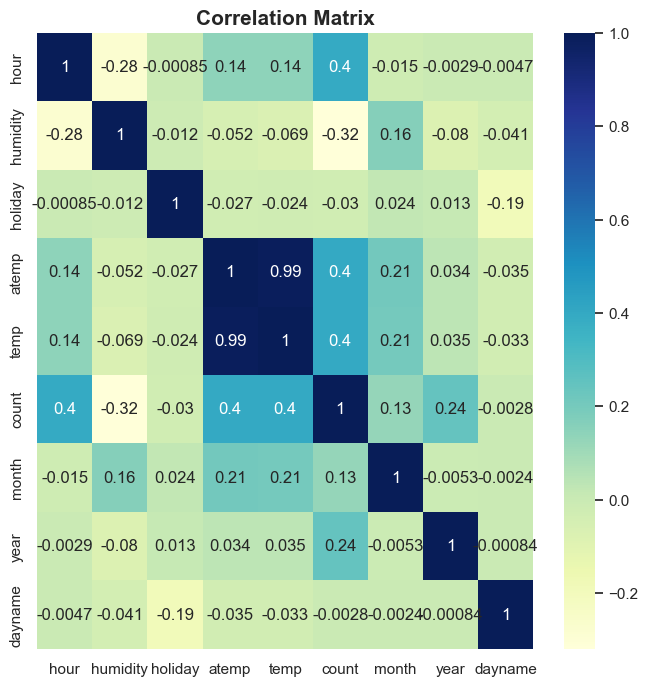

In [285]:
#Correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(df_model[num_features].corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [286]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hour      12165 non-null  int64   
 1   humidity  12165 non-null  float64 
 2   weather   12165 non-null  object  
 3   holiday   12165 non-null  category
 4   season    12165 non-null  object  
 5   atemp     12165 non-null  float64 
 6   temp      12165 non-null  float64 
 7   count     12165 non-null  int64   
 8   month     12165 non-null  category
 9   year      12165 non-null  category
 10  dayname   12165 non-null  category
dtypes: category(4), float64(3), int64(2), object(2)
memory usage: 713.7+ KB


In [287]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [288]:
calc_vif(df_model[['humidity', 'atemp', 'temp', 'hour', 'count','dayname']])

,variables,VIF
0,humidity,6.623596
1,atemp,339.222594
2,temp,306.416661
3,hour,3.918037
4,count,3.065671
5,dayname,2.928169


The correlation matrix indicates that some features have correlations (though not strong) with `count`. The highest positive correlations are found with `temp`, `atemp`, and `hour`. Meanwhile, the highest negative correlation is observed with `humidity`. This suggests that higher humidity levels result in fewer bike rentals.

It is important to note the high correlation between `temp` and `atemp` columns (0.99), indicating multicollinearity between these two columns. The high VIF scores (338 and 306) also confirm multicollinearity, with a VIF threshold for multicollinearity being above 4. Therefore, we will drop one column, `temp`. This decision is based on domain knowledge, where temp measures temperature as read by a thermometer, while `atemp` considers factors like air temperature, humidity, and wind speed.

In [289]:
# Drop `temp` column
df_model = df_model.drop('temp', axis=1)

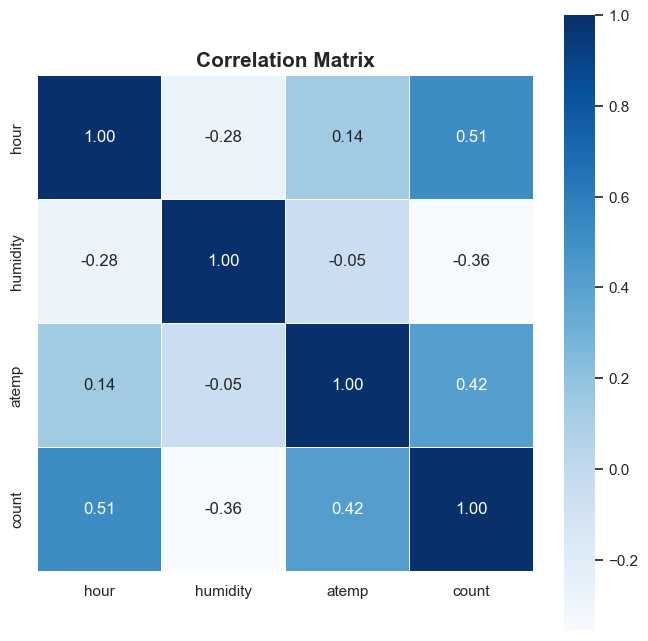

In [290]:
numeric_columns = df_model.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_columns.corr(method='spearman')

# Plot heatmap with the "Blues" palette
plt.figure(figsize=(8, 8))
palette = sns.color_palette("Blues", as_cmap=True)  # Change the palette to "Blues"
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

In [291]:
calc_vif(df_model[['humidity', 'atemp', 'hour', 'count']])

,variables,VIF
0,humidity,5.571588
1,atemp,8.360153
2,hour,3.837270
3,count,3.063059


After dropping the temp column, there was a significant decrease in the VIF score for the `atemp` column, reducing to 8.3. Although the VIF scores for the `humidity` and `atemp` columns are still above 4, we will continue to use both features because they have significant impact in determining the number of bikes needed based on different situations and conditions.

> Checking Outliers

In [292]:
#check the statistic descriptive informartion numerical
df_model.describe().select_dtypes(['float','int'])

,hour,humidity,atemp,count
count,12165.000000,12165.000000,12165.000000,12165.000000
mean,11.519770,0.625451,0.476996,189.271023
std,6.931872,0.192102,0.171857,181.223903
min,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.470000,0.333300,40.000000
50%,12.000000,0.620000,0.484800,142.000000
75%,18.000000,0.780000,0.621200,282.000000
max,23.000000,1.000000,1.000000,970.000000


In [293]:
#Checking outliers
def check_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_bound = q1 - limit
    upper_bound = q3 + limit
    print(f'lower bound :',{lower_bound})
    print(f'upper bound :',{upper_bound})

In [294]:
#Outliers in humidity
check_outliers(df_model['humidity'])

IQR: 0.31000000000000005
lower bound : {0.004999999999999893}
upper bound : {1.245}


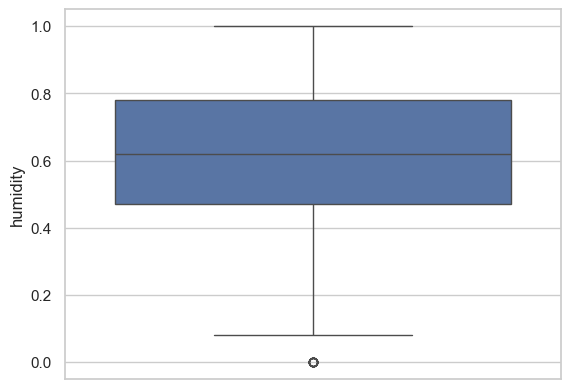

In [295]:
sns.boxplot(df_model['humidity'])
plt.show()

In [296]:
#Check outliers in temperature
check_outliers(df_model['atemp'])

IQR: 0.2879
lower bound : {-0.09854999999999997}
upper bound : {1.0530499999999998}


<Axes: ylabel='atemp'>

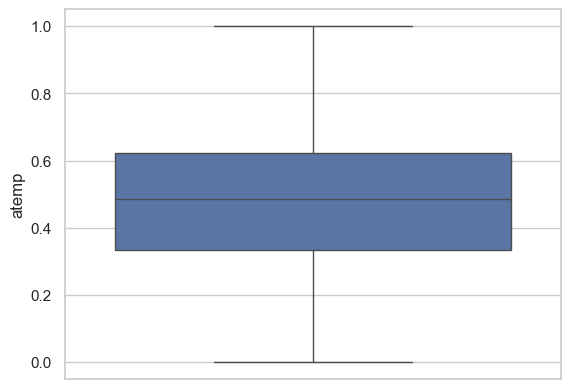

In [297]:
sns.boxplot(df_model['atemp'])

In [298]:
#outliers in count
check_outliers(df_model['count'])

IQR: 242.0
lower bound : {-323.0}
upper bound : {645.0}


<Axes: ylabel='count'>

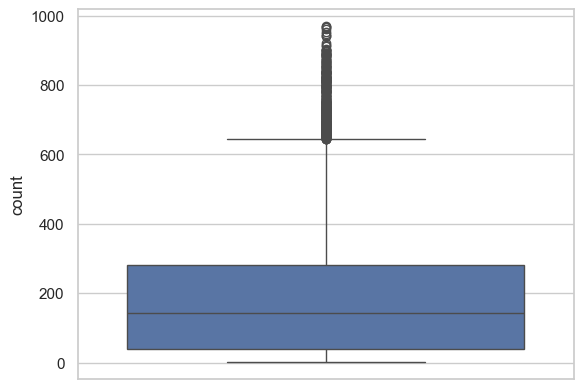

In [299]:
sns.boxplot(df_model['count'])

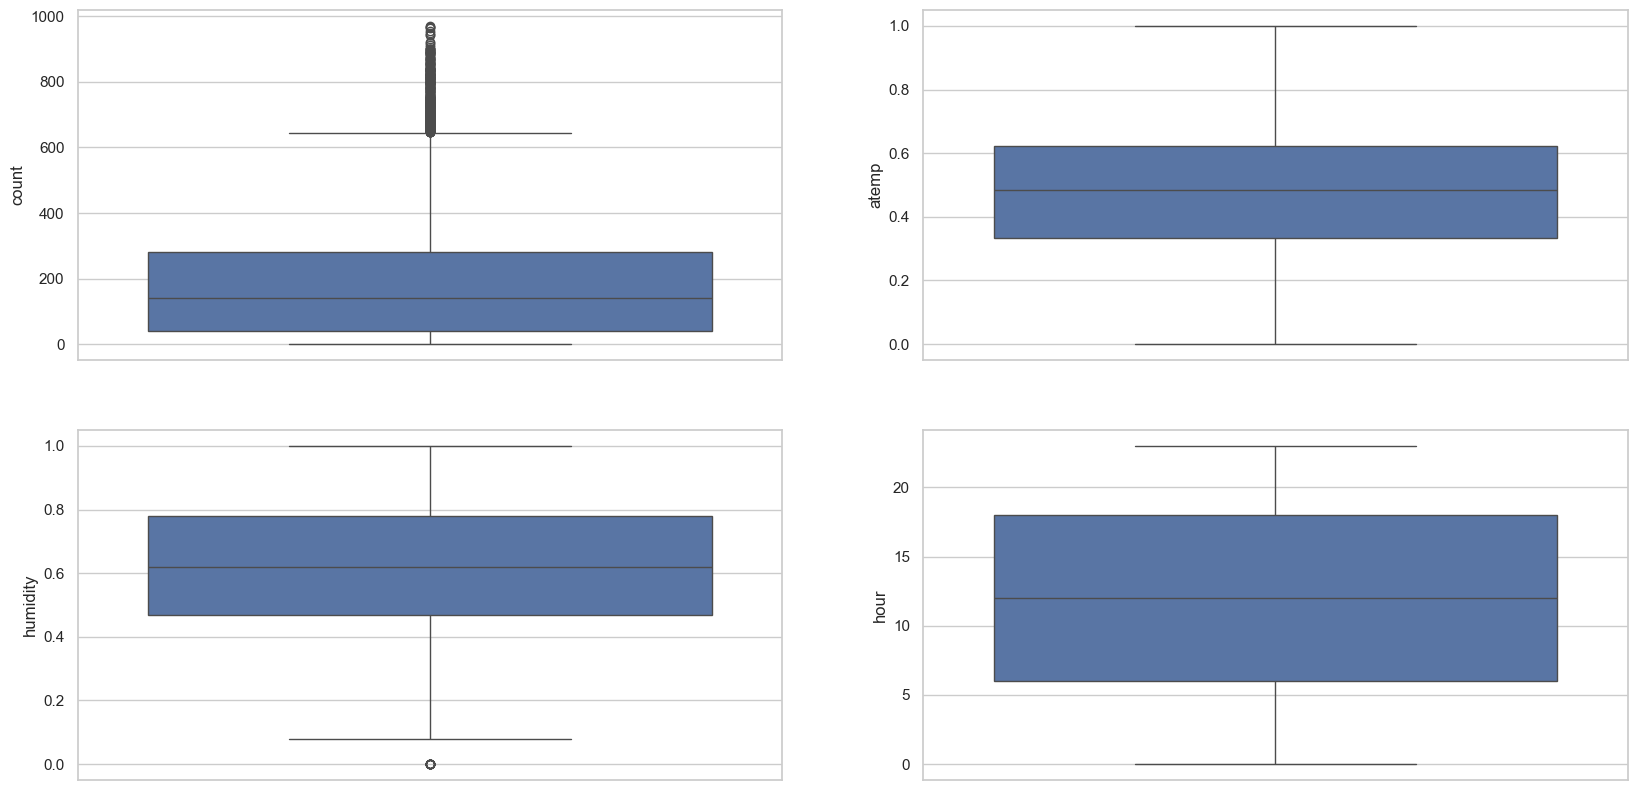

In [300]:
#boxplot to check the outliers
fig, axes = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(df_model['count'], ax=axes[0][0])
sns.boxplot(df_model['atemp'], ax=axes[0][1])
sns.boxplot(df_model['humidity'], ax=axes[1][0])
sns.boxplot(df_model['hour'], ax=axes[1][1])
plt.show()

In [301]:
#Check Humidity not between 0.0049999 and 1.245
df_model[(df_model['humidity'] > 1.245) | (df_model['humidity'] < 0.004999999999999893)].count()['humidity']


14

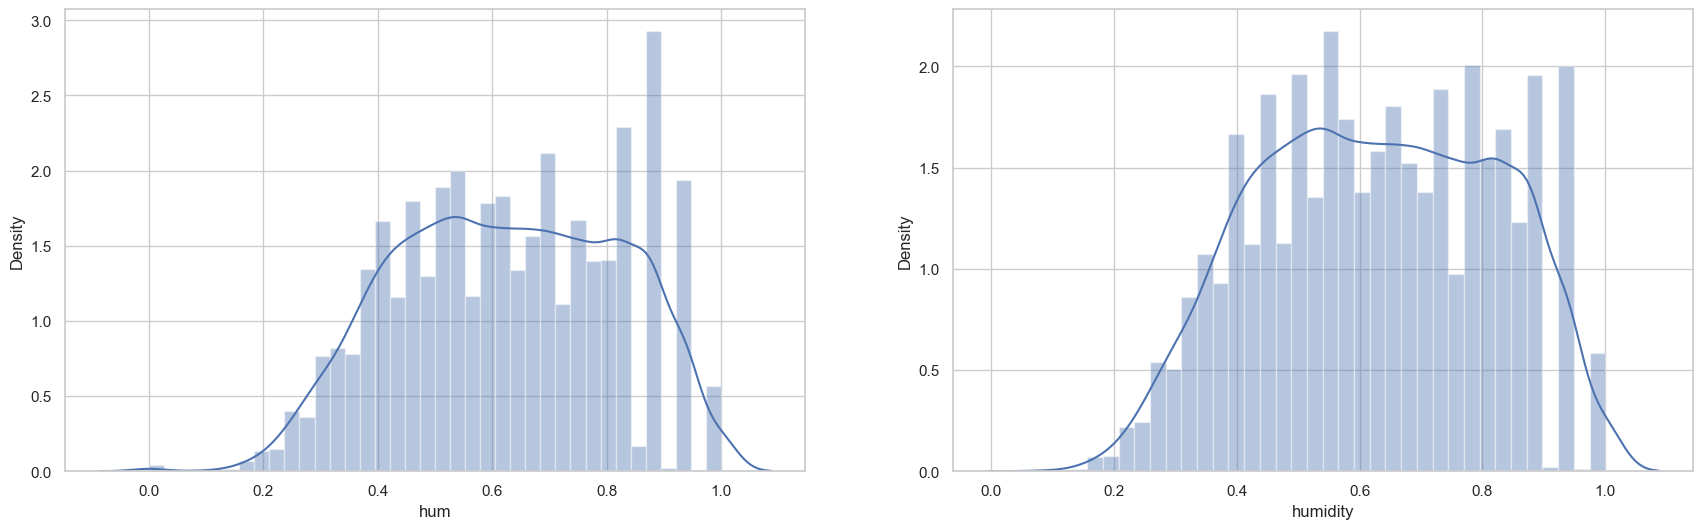

In [302]:
# Filtering data
df_model = df_model[(df_model['humidity'] <= 1.245) & (df_model['humidity'] >= 0.004999999999999893)]

# Plot distribution before and after filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['hum'], ax=axes[0])
sns.distplot(df_model['humidity'], ax=axes[1])
axes[0].set_xlabel('hum')
axes[1].set_xlabel('humidity');

In [303]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hour      12151 non-null  int64   
 1   humidity  12151 non-null  float64 
 2   weather   12151 non-null  object  
 3   holiday   12151 non-null  category
 4   season    12151 non-null  object  
 5   atemp     12151 non-null  float64 
 6   count     12151 non-null  int64   
 7   month     12151 non-null  category
 8   year      12151 non-null  category
 9   dayname   12151 non-null  category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 712.7+ KB


****
<br>

 ## Modelling

In [304]:
#Import library for modelling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold,cross_validate

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")


In [305]:
df_model.describe(include='all')

,hour,humidity,weather,holiday,season,atemp,count,month,year,dayname
count,12151.000000,12151.000000,12151,12151.0,12151,12151.000000,12151.000000,12151.0,12151.0,12151.0
unique,NaN,NaN,4,2.0,4,NaN,NaN,12.0,2.0,7.0
top,NaN,NaN,clear,0.0,summer,NaN,NaN,7.0,2012.0,2.0
freq,NaN,NaN,8071,11789.0,3169,NaN,NaN,1058.0,6106.0,1769.0
mean,11.519875,0.626172,NaN,NaN,NaN,0.477101,189.457329,NaN,NaN,NaN
std,6.932187,0.191036,NaN,NaN,NaN,0.171922,181.242898,NaN,NaN,NaN
min,0.000000,0.080000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN
25%,6.000000,0.480000,NaN,NaN,NaN,0.333300,40.000000,NaN,NaN,NaN
50%,12.000000,0.620000,NaN,NaN,NaN,0.484800,142.000000,NaN,NaN,NaN
75%,18.000000,0.780000,NaN,NaN,NaN,0.621200,282.000000,NaN,NaN,NaN


> Encoding

Target: Count

Passthrough: Humidity, Temperature, Hour, Month, Year, Daynamne

OneHotEncoding: Season, Weather, Holiday


In [306]:
#Change feature categorical to numerical
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown = 'ignore'), ['season', 'weather', 'holiday'])
    # ('Binary', ce.BinaryEncoder(), ['dayname'])
], remainder='passthrough')

> Data Splitting

In [307]:
X = df_model.drop(['count'], axis=1)
y = np.array(df_model['count'])


> Train & Test Splitting

In [308]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2005)

> Choose Benchmark Model

In [309]:
#Define the algorith that will use
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2005)
rf = RandomForestRegressor(random_state=2005)
gb = GradientBoostingRegressor(random_state=2005)
xgb = XGBRegressor(random_state=2005)

In [310]:
# Modeling is done in a logarithmic scale, but then inverse transformed for interpretation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Candidate algorithms
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

# Define the scoring metrics
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R2': 'r2'
}

# Lists to store the scores
score_mae = []
score_mape = []
score_r2 = []

# Define the preprocessing step (assuming 'transformer' is defined elsewhere)

# Finding the best algorithm based on MAE, MAPE, R2
for model in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=8)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
    ])
    
    model_cv = cross_validate(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring=scoring, 
        error_score='raise'
    )
    
    score_mae.append(model_cv['test_MAE'].mean())
    score_mape.append(model_cv['test_MAPE'].mean())
    score_r2.append(model_cv['test_R2'].mean())

# Creating a DataFrame for the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'R2': score_r2
})

results

,Model,MAE,MAPE,R2
0,Linear Regression,-106.474695,-1.361903,0.205071
1,KNN Regressor,-40.993247,-0.394992,0.864377
2,DecisionTree Regressor,-41.030232,-0.439500,0.845962
3,RandomForest Regressor,-29.332776,-0.290825,0.925625
4,Gradient Boosting,-47.529187,-0.379345,0.817066
5,XGBoost Regressor,-26.964132,-0.257352,0.937008



From the code above, I use the `TransformedTargetRegressor`to handle the skewness in the data. This `TransformedTargetRegressor` is used to manage the skewness because the target variable has outliers and is right-skewed. In this context, the target (dependent variable) is transformed using a logarithmic function (`np.log`) before modeling and then returned to its original scale with the inverse function (`np.exp`) after modeling. Here, `lr`, `knn`, `dt`, `rf`, `gb`, and `xgb` are the machine learning models used. Each of these models is equipped with a `TransformedTargetRegressor` that transforms the target using a logarithm and returns it using an exponential function.

In [311]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'MAE': score_mae,
    'MAPE': score_mape,
    'R-squared': score_r2
}).sort_values(by='MAPE',ascending=False)

,Model,MAE,MAPE,R-squared
5,XGBoost Regressor,-26.964132,-0.257352,0.937008
3,RandomForest Regressor,-29.332776,-0.290825,0.925625
4,Gradient Boosting,-47.529187,-0.379345,0.817066
1,KNN Regressor,-40.993247,-0.394992,0.864377
2,DecisionTree Regressor,-41.030232,-0.439500,0.845962
0,Linear Regression,-106.474695,-1.361903,0.205071


From the results above, we know that XGBoost is the best model with the highest performance. The MAE score is 26.96, the MAPE is 0.25, and the R-Squared is approximately 0.94, which is higher than the other five models. Therefore, we can use the test set for prediction and benchmarking using the XGBoost model.

> Extreme Gradient Boosting (XGBoost)

Extreme Gradient Boosting (XGBoost) is a highly efficient and scalable implementation of the gradient boosting framework. It is designed to deliver superior performance and speed, making it a popular choice for many machine learning tasks. 

In XGBoost, **Decision Trees** are built sequentially, with each tree trying to correct the errors of the previous one. The model assigns weights to all independent variables, which are then input into the Decision Trees to predict the outcome. If a variable is predicted incorrectly, its weight is increased, and the variable is then fed into the next Decision Tree. This process continues iteratively, enhancing the model’s accuracy over time.

#### Key Features of XGBoost:
- **Handling Missing Values**: XGBoost has a built-in capability to handle missing data. It can learn which path to take for missing values, making it robust for real-world data that often has missing entries.
- **Regularization Techniques**: XGBoost uses L1 (Lasso) and L2 (Ridge) regularization to prevent overfitting, which helps improve model generalization.
- **Parallel Processing**: XGBoost supports parallel processing, allowing it to utilize multiple CPU cores for training, which significantly speeds up the training process.
- **Tree Pruning**: XGBoost uses a process called "max depth pruning." It starts from the bottom and prunes the tree backward, ensuring only optimal splits are used.
- **Sparsity Awareness**: The algorithm treats zero values (sparse data) efficiently and can make use of sparse data structures, which is useful for datasets with many zero entries.
- **Cross-validation**: XGBoost includes cross-validation at each iteration of the boosting process, which allows users to get accurate performance metrics and avoid overfitting.

Despite its many advantages, XGBoost is considered a **non-interpretable model** because it is challenging to determine which variables were incorrectly predicted. Nevertheless, its robust performance across various data types and use cases makes it a reliable choice for many data science problems.

#### Additional Explanation:
- **Gradient Boosting Framework**: XGBoost is built on the gradient boosting framework, where models are trained sequentially, and each new model tries to correct the errors of the previous ones.
- **Objective Function**: XGBoost uses a second-order Taylor expansion to approximate the loss function, providing more accurate results and faster convergence.
- **Scalability**: XGBoost is designed to scale to billions of examples in distributed or memory-limited settings, making it highly suitable for large datasets.

### Sources:
- [XGBoost: A Scalable Tree Boosting System](https://arxiv.org/abs/1603.02754)
- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/)
- [GeeksforGeeks XGBoost Article](https://www.geeksforgeeks.org/xgboost/)


> Predict to Test Set with the Benchmark Model

In [312]:
xgb = TransformedTargetRegressor(XGBRegressor(random_state=2005), func=np.log, inverse_func=np.exp)

score_mae = []
score_mape = []
score_r2 = []

estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)
# score_mae.append(mean_absolute_error(y_test, y_pred))
score_mae.append(mean_absolute_error(y_test, y_pred))
score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'MAE': score_mae, 'MAPE': score_mape, 'R-squared': score_r2}, index=['XGB'])
score_before_tuning

,MAE,MAPE,R-squared
XGB,25.315776,0.248794,0.950021


From score above, we know that predict using test set XGBoost still have best performance. There is MAE and MAPE is decreasing and the R2 score is increasing.

> Hyperparameter Tuning (GridSearch)

Hyperparameter tuning is crucial for optimizing the performance of machine learning models, including XGBoost. GridSearch is a method that systematically works through multiple combinations of hyperparameter values, cross-validating each combination to determine which set provides the best performance.

Here are the key hyperparameters you mentioned, along with their explanations and the source for this information:

1. **Tree Depth (max_depth)**:
    - **Explanation**: This parameter controls the maximum depth of each tree. Increasing the depth of the tree allows the model to capture more complex patterns but can also lead to overfitting.

2. **Learning Rate (learning_rate)**:
    - **Explanation**: This parameter controls the step size shrinkage to prevent overfitting. It scales the contribution of each tree by a factor (learning rate) before adding it to the existing trees. Smaller values typically lead to more accurate models but require more trees.

3. **Number of Trees (n_estimators)**:
    - **Explanation**: This parameter sets the number of trees to be built in the model. More trees can improve the model's performance up to a point but will also increase computation time and the risk of overfitting.


By systematically testing different combinations of these hyperparameters using GridSearch, you can identify the configuration that yields the best performance for your specific dataset. The goal is to balance the model's complexity and its ability to generalize to new data.

### Sources:
- [XGBoost Parameters Documentation](https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster)
- [GeeksforGeeks XGBoost Article](https://www.geeksforgeeks.org/xgboost/)


In [313]:
# Tree depth
max_depth = [2, 3, 4, 5, 6, 7, 8, 9]

# Learning rate
learning_rate = [0.1, 0.001, 0.0001, 0.2, 0.3, 0.5, 0.7]

# Number of trees
n_estimators = list(np.arange(200, 301, 20))

hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
}

xgb = XGBRegressor(random_state=12, verbosity=0)

# Create algorithm pipeline
estimator_xgb = Pipeline([
    ('preprocessing', transformer),
    ('model', xgb)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=12)

# Hyperparameter tuning (GridSearchCV)
gridsearch_xgb = GridSearchCV(
    estimator_xgb,
    param_grid=hyperparam_space_xgb,
    cv=crossval,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
)


In [314]:

# Fitting data training to find best parameter
gridsearch_xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning:

GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['season',
                                                                          'weather',
                                                                          'holiday'])])),
                                       ('model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=12, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.1, 0.001, 0.0001, 0.2, 0.3,
                                                  0.5, 0.7],
                         'model__max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'model__n_estimators': [200, 220, 240, 260, 280, 300]},
             scoring='neg_mean_absolute_error')

In [315]:
# obsv = transformer.transform(df_model[df_model['count'] == 970])

In [316]:
# obsv

In [317]:
print('XGBoost')
print('Best_score:', gridsearch_xgb.best_score_)
print('Best_params:', gridsearch_xgb.best_params_)

XGBoost
Best_score: -26.288635153572965
Best_params: {'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 200}


In [319]:
model = { 'XGB' : TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)
}

xgb_tuning = TransformedTargetRegressor(gridsearch_xgb.best_estimator_, func=np.log, inverse_func=np.exp)

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)
r2_xgb_tuning = r2_score(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning, 'R-squared': r2_xgb_tuning}, index=model.keys())
score_after_tuning

,MAE,MAPE,R-squared
XGB,23.970842,0.243486,0.953526


> Performance Comparison

This is the compare between XGBoost performance before and after Hyperparameter Tuning

In [320]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,MAE,MAPE,R-squared
XGB,25.315776,0.248794,0.950021


In [321]:
score_after_tuning

,MAE,MAPE,R-squared
XGB,23.970842,0.243486,0.953526


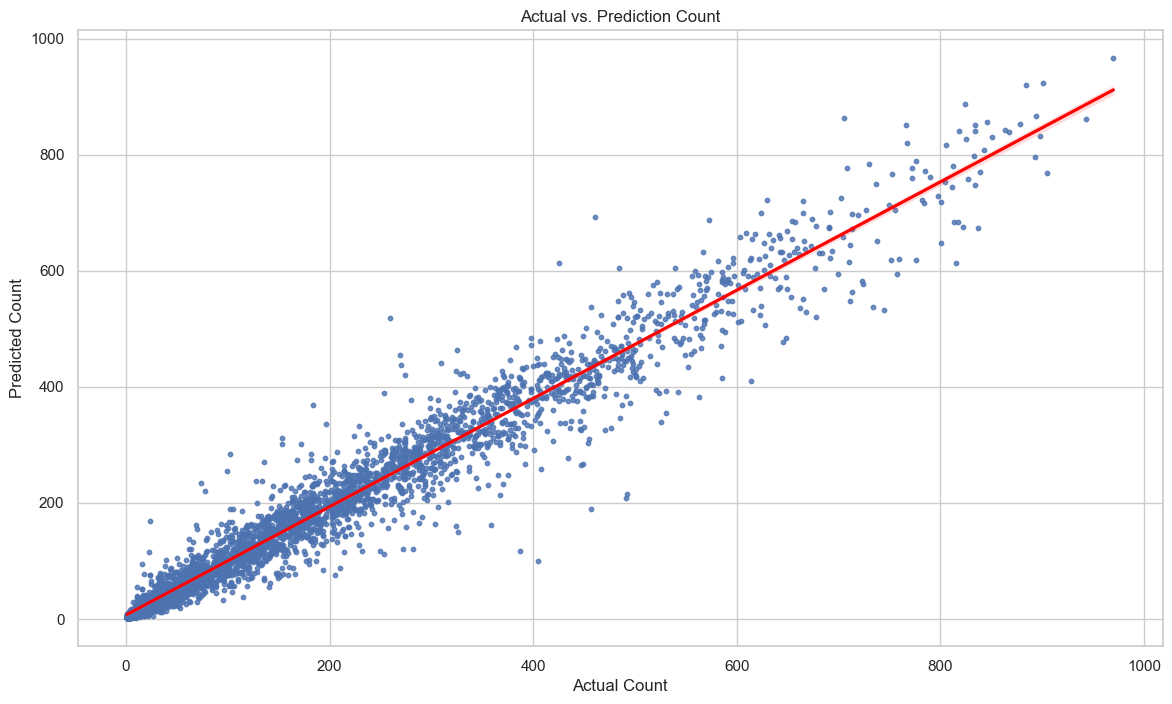

In [322]:
plt.figure(figsize=(14, 8))

# Scatter plot with linear regression line
sns.regplot(x=y_test, y=y_pred_xgb_tuning, scatter_kws={'s':10}, line_kws={"color":"red"}).set(
    title='Actual vs. Prediction Count', 
    xlabel='Actual Count', 
    ylabel='Predicted Count'
)

plt.show()

The scatter plot with the linear regression line provided in the image represents the relationship between the actual bike counts (`y_test`) and the predicted bike counts (`y_pred_xgb_tuning`) from XGBoost model.

Correlation and Fit:

* The red line represents the linear regression line fitted to the data points. The closer the scatter points are to this line, the better the model's predictions.
* The linear regression line suggests that there is a strong positive correlation between the actual and predicted values. As the actual count increases, the predicted count also increases proportionally.

Prediction Accuracy:

* Most of the data points are clustered around the red line, indicating that the predictions are quite accurate.
* However, there are some points that deviate significantly from the line, particularly at higher actual counts. This suggests that while the model performs well for a majority of the cases, it may struggle with higher values, resulting in less accurate predictions for these instances.

Residuals and Variance:

* The spread of points around the line also gives insight into the variance of the residuals. A uniform spread indicates homoscedasticity, meaning the variance of the residuals is constant across all levels of the predicted values.
* If there were patterns in the residuals (e.g., a funnel shape), this could indicate heteroscedasticity, suggesting that the variance of the residuals changes with the predicted values.

Model Performance:

* The slope of the red line is approximately 1, which suggests that the model's predictions are proportional to the actual counts.
* If the points were to deviate significantly from this line, it would indicate systematic errors in the model's predictions.

> Model Limitation

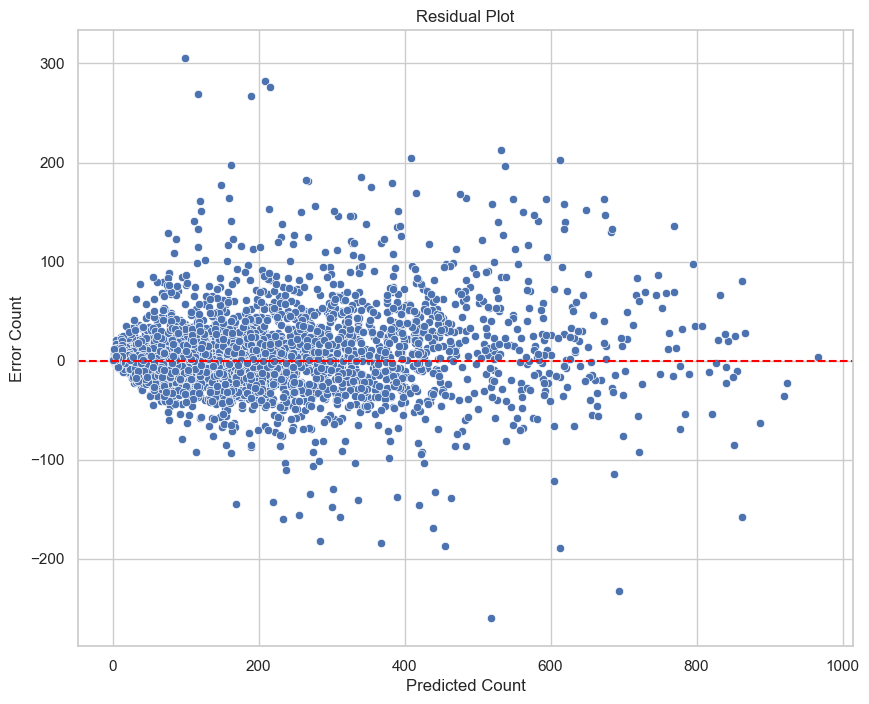

In [323]:
# Calculate residuals
residual = y_test - y_pred_xgb_tuning

plt.figure(figsize=(10, 8))

# Scatter plot of residuals
sns.scatterplot(x=y_pred_xgb_tuning, y=residual).set(
    title='Residual Plot', 
    xlabel='Predicted Count', 
    ylabel='Error Count'
)

# Add a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

In [324]:
# Create the dataframe
dftarget = pd.DataFrame({'Actual Count': y_test, 'Predicted Count': y_pred_xgb_tuning})

# Define ranges and labels
ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 250), (251, 300), 
          (301, 350), (351, 400), (401, 450), (451, 500), (501, 550), (551, 600), 
          (601, float('inf'))]
labels = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', 
          '351-400', '401-450', '451-500', '501-550', '551-600', '>600']

# Create the dataframes based on the defined ranges
target_range = [dftarget[(dftarget['Actual Count'] > low) & (dftarget['Actual Count'] <= high)] for low, high in ranges]
target_range.append(dftarget)  # Add the overall dataframe

# Add the overall label
labels.append('All Count Range (Max 953)')

# Calculate the metrics
mae = [mean_absolute_error(df['Actual Count'], df['Predicted Count']) for df in target_range]
mape = [mean_absolute_percentage_error(df['Actual Count'], df['Predicted Count']) for df in target_range]

# Create the final dataframe
range_metrics = pd.DataFrame({
    "Score MAE": mae,
    "Score MAPE": mape,
}, index=labels)

range_metrics

,Score MAE,Score MAPE
<=50,6.625687,0.503021
51-100,16.658716,0.225928
101-150,21.468126,0.172045
151-200,25.440823,0.146815
201-250,25.862781,0.116267
251-300,32.055356,0.116432
301-350,34.896643,0.108170
351-400,39.623156,0.105902
401-450,43.183431,0.101038
451-500,55.399033,0.116599


Errors in the Low Range (<=50): The model is less accurate in predicting values in the low range. Although the MAE is relatively small (6.625687), the Mean Absolute Percentage Error (MAPE) is high (0.503021), indicating that the model cannot be relied upon for very low values.

Model Performance in the Medium to High Range: From values 51 to 600, the MAE increases gradually from 16.658716 to 45.043717, but the MAPE decreases significantly, indicating that while absolute errors increase, relative errors decrease. This suggests that the model can still predict values with reasonable accuracy in this range.

Overall Model Accuracy: With an average MAE of 23.970842 and MAPE of 0.243486 across all ranges, the model shows varying performance. It performs reasonably well in medium to high ranges but struggles with accuracy in very low and very high value predictions.

> Feature Importances

In [325]:
# Plot feature importances
xgb_tuning = gridsearch_xgb.best_estimator_

# xgb_tuning[1].predict(X_train)
xgb_tuning[0].transform(X_train).shape

(8505, 13)

In [326]:
features = list(transformer.get_feature_names_out())
list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['season_spring',
 'season_summer',
 'season_winter',
 'weather_Light snow/Light rain',
 'weather_clear',
 'weather_cloudy',
 'holiday_1',
 'hour',
 'humidity',
 'atemp',
 'month',
 'year',
 'dayname']

In [327]:
imp = xgb_tuning[-1].feature_importances_
imp

array([0.00440974, 0.00849467, 0.14140643, 0.07861202, 0.01464309,
       0.00539006, 0.07822937, 0.24729994, 0.01268446, 0.07706799,
       0.02012468, 0.23746525, 0.07417224], dtype=float32)

In [328]:
# to dataframe
feature_imp = pd.DataFrame({
    'Importance':imp,
    'Features':list_features
}).sort_values(by='Importance',ascending=False)

In [329]:
feature_imp

,Importance,Features
7,0.247300,hour
11,0.237465,year
2,0.141406,season_winter
3,0.078612,weather_Light snow/Light rain
6,0.078229,holiday_1
9,0.077068,atemp
12,0.074172,dayname
10,0.020125,month
4,0.014643,weather_clear
8,0.012684,humidity


<Axes: xlabel='Importance', ylabel='Features'>

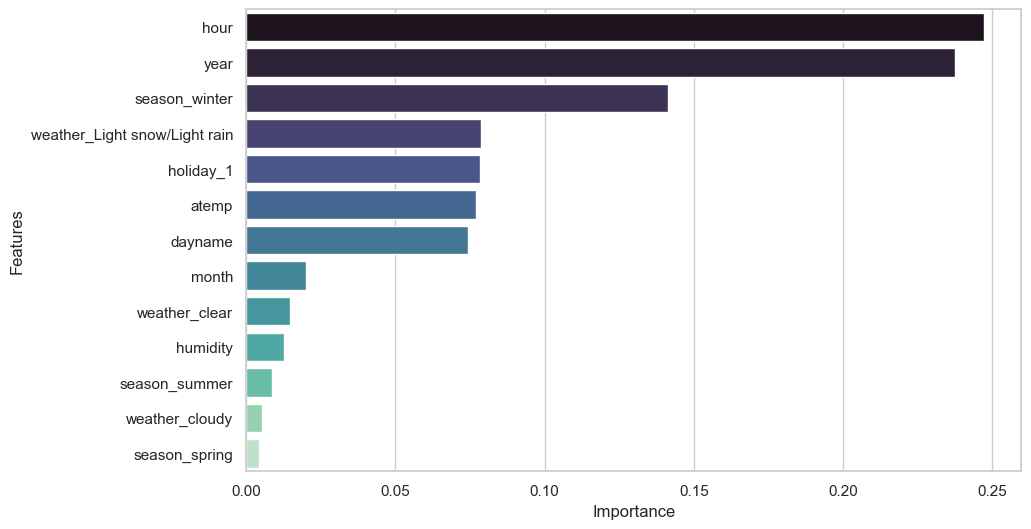

In [330]:
# Visualization
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid')
sns.barplot(data=feature_imp,x='Importance',y='Features',orient='h',palette='mako')

The bar plot visualizes the importance of various features in the predictive model. It shows that `hour` is the most influential feature, followed by `year` and `season_winter`, indicating these factors significantly impact the model's predictions. Features such as `weather_Light snow/Light rain` and `holiday_1` also play a notable role. Conversely, features like `season_spring` and `weather_cloudy` have relatively low importance, suggesting they contribute less to the model's predictive power. This interpretation highlights the key variables that the model relies on for making accurate predictions.

> EXPLAINABLE AI

In [331]:
import shap

In [332]:
xgb_tuning.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['season', 'weather',
                                                   'holiday'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_roun...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=12, ...))])

In [333]:
explainer =shap.Explainer(
    xgb_tuning[1].predict,
    xgb_tuning[0].transform(X_test)
)

shap_values = explainer(xgb_tuning[0].transform(X_test))

PermutationExplainer explainer: 3647it [03:17, 17.50it/s]                          


In [334]:
i = 10
X_test.iloc[i],y_test[i]

(hour            19
 humidity      0.48
 weather     cloudy
 holiday          0
 season      spring
 atemp       0.6818
 month            6
 year          2012
 dayname          0
 Name: 8784, dtype: object,
 596)

In [335]:
# X_test

In [336]:
[i for i in enumerate(list_features)]


[(0, 'season_spring'),
 (1, 'season_summer'),
 (2, 'season_winter'),
 (3, 'weather_Light snow/Light rain'),
 (4, 'weather_clear'),
 (5, 'weather_cloudy'),
 (6, 'holiday_1'),
 (7, 'hour'),
 (8, 'humidity'),
 (9, 'atemp'),
 (10, 'month'),
 (11, 'year'),
 (12, 'dayname')]

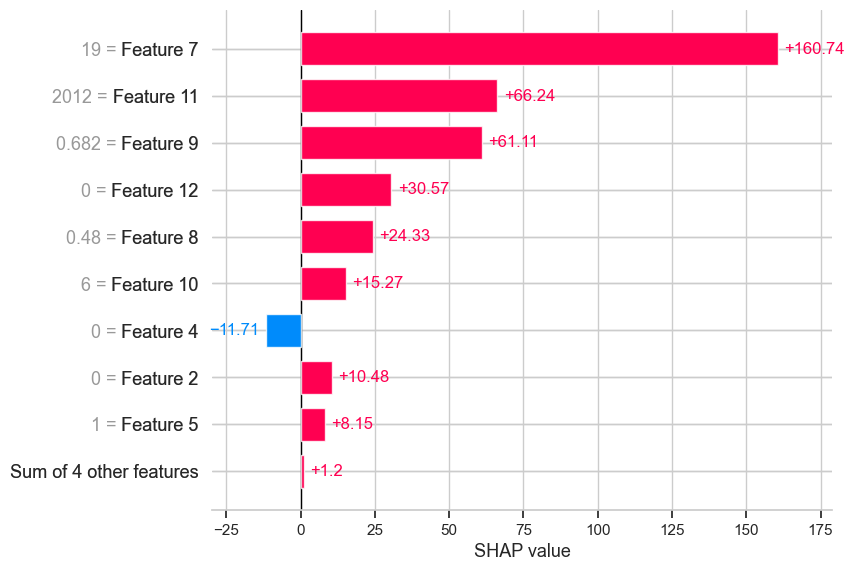

In [339]:
# shap_values for explain observation in test
shap.plots.bar(shap_values[i])

Dapat dilihat bahwa feature 7 memiliki kontribusi yang paling besar 

PermutationExplainer explainer: 3647it [04:49, 12.12it/s]                            


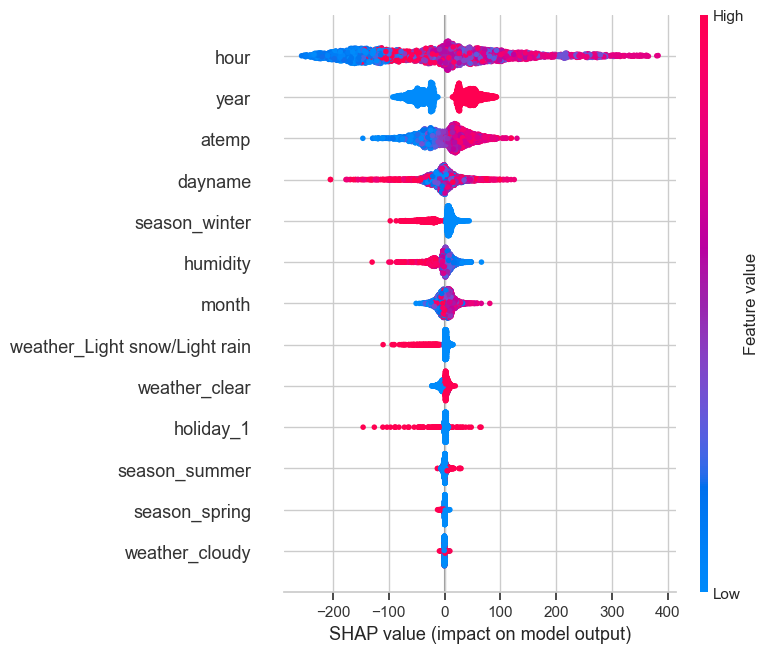

In [340]:
# Fit the best model on the training data (assuming xgb_tuning is your trained model)
xgb_tuning.fit(X_train, y_train)

# Transform the training data using the pipeline
X_train_transformed = pd.DataFrame(
    xgb_tuning.named_steps['preprocessing'].transform(X_train),
    columns=list_features
)

# Transform the test data using the pipeline
X_test_transformed = pd.DataFrame(
    xgb_tuning.named_steps['preprocessing'].transform(X_test),
    columns=list_features
)

# Access the decision tree model from within the pipeline
xgb_tuning_model = xgb_tuning.named_steps['model']

# Create an object that can calculate SHAP values using PermutationExplainer
explainer = shap.Explainer(xgb_tuning_model.predict, X_train_transformed, algorithm="permutation")

# Calculate SHAP values for test data
shap_values = explainer(X_test_transformed)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test_transformed)

We can tell that the highest (red) hour percentages (hour) tend to correlate with a decrease in the likelihood of Highly Recommended. But, the middle values (purple) tend to increase it. The shap is representative about the most influential features in predicting to the target `Count` which the features is `Hour`, `Year`, `Atemp`. These features have the highest impact on the model's output to predict total count of bike.

****
<br>

 ## Conclusion

Based on the modeling process, the following conclusions have been drawn:
* The best model obtained for the dataset Bike Sharing to predict total bike in every condition and situation is XGBoost Regressor model
* From the hyperparameter tuning process, we determined that the best parameters for the benchmark XGBoost model are as follows:
 1. n_estimators: 200
 2. max_depth: 8
 3. learning_rate: 0.1
* The evaluation metrics used for this model are MAE, MAPE, and R2. The MAPE value of approximately 24% after hyperparameter tuning indicates that if the model is used to predict the number of bikes needed within the trained range **(up to 980 bikes)** , the predictions will typically be off by about 24%.
* The model's limitations are evident in its varying accuracy across different value ranges. It is less accurate in predicting values in the low range (<=50), where although the MAE is relatively small (6.63), the MAPE is high (50.30%), indicating unreliability for very low values. In the medium to high range (51-600), the MAE gradually increases from 16.66 to 45.04, while the MAPE significantly decreases, suggesting reasonable accuracy despite increasing absolute errors. Overall, with an average MAE of 23.97 and MAPE of 0.24 across all ranges, the model performs reasonably well in medium to high ranges but struggles with accuracy in predicting very low and very high values.
* Feature Importance
    - *Feature Importance*: The importance of various features in the predictive model. It shows that `hour` is the most influential feature.
    - *SHAP*: The most influential features in predicting Count are Hour, Year, atemp. These features have the highest impact on the model's output.

****
<br>

 ## Recommendation


Recommendations for Improving the Bike-Sharing Prediction Model:

* Addition of Relevant Features: Incorporate features with higher correlation to the target variable (count), such as the locations of bike stations and their proximity to offices, schools, and public spaces.

* Expand Data Range: Increase the dataset's time span beyond the current 1-year range (2011-2012) to improve model predictions and capture more diverse trends and patterns.

* Develop Additional Models: Utilize the current model to create others that predict specific metrics like the number of bikes rented at particular locations, helping identify strategic spots for new bike stations.

* Leverage Data Characteristics: Exploit the unique data generated by bike-sharing systems, such as travel duration and departure/arrival positions, to provide deeper insights into urban mobility and detect significant city events.

* Continuous Model Improvement: Implement continuous monitoring and periodic retraining of the model with new data to maintain prediction accuracy and relevance over time.

* Optimize Bike Distribution: Use insights from the data and model to optimize bike distribution, ensuring an adequate number of bikes are available at all times, thereby enhancing user satisfaction and operational efficiency.

> Save Model

In [ ]:
X_train_preprocess = transformer.fit_transform(X_train)
y_train

array([149,  17,  96, ...,  20, 204, 320])

In [ ]:
import pickle

gridsearch_xgb.best_estimator_.fit(X, y)

pickle.dump(gridsearch_xgb.best_estimator_, open('Final_Model_Capstone_Module_3_LuqmanIlman.sav', 'wb'))

> Test Using unseen data after dump

In [ ]:
import pandas as pd
import numpy as np
import pickle

In [ ]:
df_test = pd.read_csv('Test_file_PWDK copy.csv')
df_test

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-01-01,0.75,2,0,1,0.2576,0.24,5,0,1,1
1,2011-01-01,0.86,1,0,1,0.2576,0.20,7,1,2,3
2,2011-01-01,0.75,1,0,1,0.2879,0.24,8,1,7,8
3,2011-01-01,0.76,1,0,1,0.3485,0.32,9,8,6,14
4,2011-01-01,0.77,1,0,1,0.4242,0.42,12,29,55,84
...,...,...,...,...,...,...,...,...,...,...,...
5209,2012-12-31,0.45,2,0,1,0.2879,0.28,15,69,246,315
5210,2012-12-31,0.48,2,0,1,0.2727,0.26,18,10,112,122
5211,2012-12-31,0.60,2,0,1,0.2576,0.26,20,8,81,89
5212,2012-12-31,0.56,1,0,1,0.2727,0.26,22,13,48,61


> Data Preprocess and Feature engineering

In [ ]:
def preprocess(df):
    df = df.sort_values(['dteday', 'hr']).reset_index(drop=True)
    columns = ['dteday', 'hr', 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'casual', 'registered', 'cnt']
    df = df[columns]
    
    df['season'] = df['season'].replace({1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'})
    df['weathersit'] = df['weathersit'].replace({1: 'clear', 2: 'cloudy', 3: 'Light snow/Light rain', 4: 'Heavy rain/Snow'})
    
    df = df.rename(columns={
        'weathersit': 'weather',
        'dteday': 'date',
        'hr': 'hour',
        'hum': 'humidity',
        'cnt': 'count'
    })
    
    return df

# Feature engineering function
def feature_engineering(df):
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['dayname'] = pd.to_datetime(df['date']).dt.day_of_week
    df['holiday'] = df['holiday'].astype('category')
    df['year'] = df['year'].astype('category')
    df['month'] = df['month'].astype('category')
    df['dayname'] = df['dayname'].astype('category')
    
    df = df.drop(columns=['date', 'casual', 'registered', 'temp'])
    
    return df

# Apply preprocess and feature engineering functions
df_test = preprocess(df_test)
df_test = feature_engineering(df_test)

In [ ]:
filename = 'Final_Model_Capstone_Module_3_LuqmanIlman.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
X = df_test.drop('count', axis=1)
y = df_test['count']

In [ ]:
X

,hour,humidity,weather,holiday,season,atemp,month,year,dayname
0,5,0.75,cloudy,0,winter,0.2576,1,2011,5
1,7,0.86,clear,0,winter,0.2576,1,2011,5
2,8,0.75,clear,0,winter,0.2879,1,2011,5
3,9,0.76,clear,0,winter,0.3485,1,2011,5
4,12,0.77,clear,0,winter,0.4242,1,2011,5
...,...,...,...,...,...,...,...,...,...
5209,15,0.45,cloudy,0,winter,0.2879,12,2012,0
5210,18,0.48,cloudy,0,winter,0.2727,12,2012,0
5211,20,0.60,cloudy,0,winter,0.2576,12,2012,0
5212,22,0.56,clear,0,winter,0.2727,12,2012,0


In [ ]:
y_pred_test = loaded_model.predict(X)


In [ ]:
print('MAE',mean_absolute_error(y, y_pred_test))
print('MAPE',mean_absolute_percentage_error(y, y_pred_test))
print('R-Squared',r2_score(y, y_pred_test))

MAE 24.123017229381297
MAPE 0.3248023141120247
R-Squared 0.9514418408939972


In [345]:
X_test[:100].to_csv('test_data.csv',index=False)